In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.reshape(-1, 1)
y_train

array([112635.,  55794.,  83088., 101302.,  56642.,  66029.,  64445.,
        61111., 113812.,  91738.,  46205., 121872.,  60150.,  39891.,
        81363.,  93940.,  57189.,  54445., 105582.,  43525.,  39343.,
        98273.,  67938.,  56957.])

In [81]:
from sklearn.preprocessing import StandardScaler
Sc_X = StandardScaler()
Sc_y = StandardScaler()

X_train = Sc_X.fit_transform(X_train.reshape(-1, 1))
X_test = Sc_X.transform(X_test.reshape(-1, 1))

y_train = Sc_y.fit_transform(y_train.reshape(-1, 1))
y_test = Sc_y.transform(y_test.reshape(-1, 1))
y_train

array([[ 1.56283548],
       [-0.72970392],
       [ 0.37113122],
       [ 1.1057473 ],
       [-0.69550196],
       [-0.31690082],
       [-0.3807875 ],
       [-0.51525604],
       [ 1.61030683],
       [ 0.72000731],
       [-1.11645222],
       [ 1.93538674],
       [-0.55401557],
       [-1.3711116 ],
       [ 0.30155767],
       [ 0.80881947],
       [-0.67344009],
       [-0.78411245],
       [ 1.27837039],
       [-1.22454331],
       [-1.39321381],
       [ 0.98358017],
       [-0.23990609],
       [-0.68279723]])

In [82]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [83]:
y_pred = Sc_y.inverse_transform(regressor.predict(X_train).reshape(-1, 1))

In [84]:
y_pred

array([[110164.52804875],
       [ 59427.80820693],
       [ 73456.77183618],
       [103777.76320799],
       [ 51772.24041074],
       [ 70773.639282  ],
       [ 53792.37341377],
       [ 63850.1821682 ],
       [105467.18057917],
       [ 94213.76370131],
       [ 43722.96826884],
       [109321.88554118],
       [ 52447.68106923],
       [ 47158.65727076],
       [ 82110.36670753],
       [ 83569.34441655],
       [ 57200.91010093],
       [ 53792.37341377],
       [108785.48896308],
       [ 46013.94871588],
       [ 43761.64904151],
       [ 97441.48945686],
       [ 68264.08652143],
       [ 59427.80820693]])

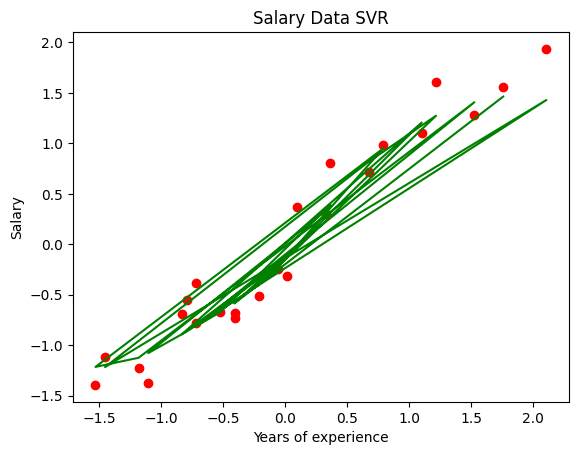

In [85]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='green')
plt.title('Salary Data SVR')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()